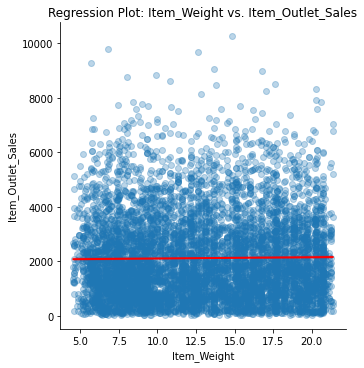

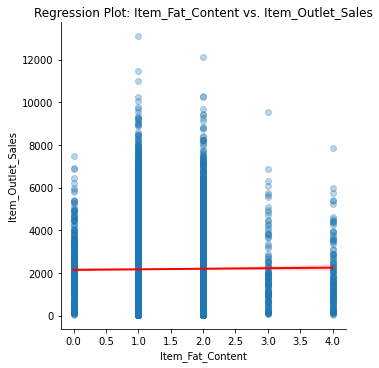

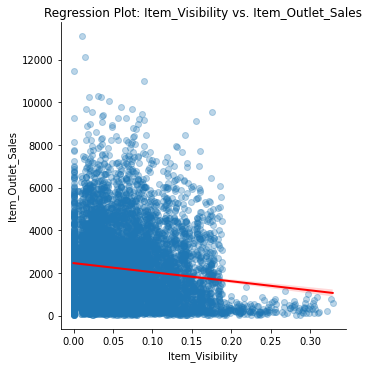

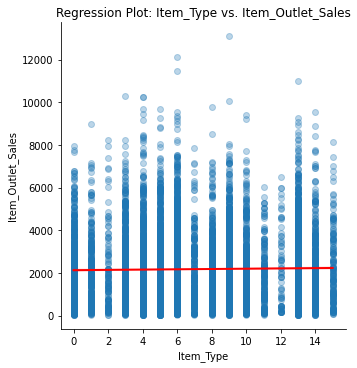

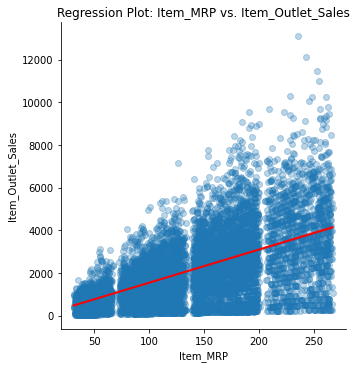

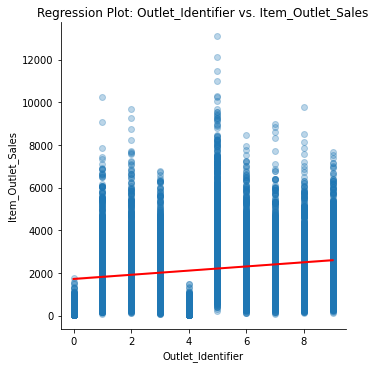

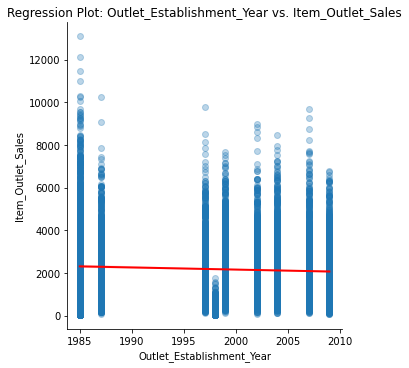

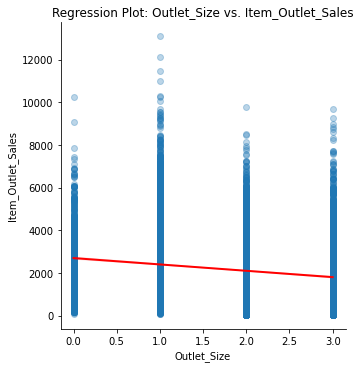

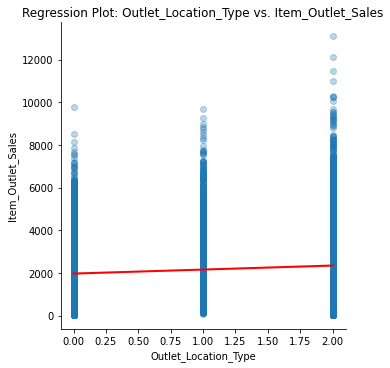

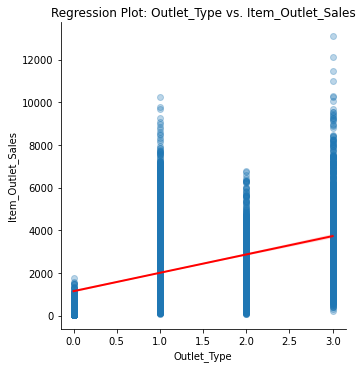

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Load your dataset
data = pd.read_csv('bigmart_train.csv')

# List of independent variables to check for linearity
independent_variables = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Dependent variable
dependent_variable = 'Item_Outlet_Sales'

label_encoder = LabelEncoder()
for variable in independent_variables:
    if data[variable].dtype == 'object':
        data[variable] = label_encoder.fit_transform(data[variable])


for variable in independent_variables:
    sns.lmplot(x=variable, y=dependent_variable, data=data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'Regression Plot: {variable} vs. {dependent_variable}')
    plt.show()

Durbin-Watson Statistic: 2.0077072476975286


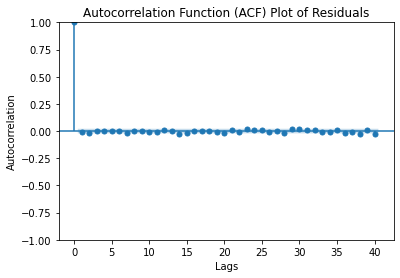

In [249]:
import statsmodels.api as sm
# Fit your linear regression model first and calculate residuals
# Replace 'independent_variables' and 'dependent_variable' with your actual variables
from sklearn.impute import SimpleImputer
from statsmodels.stats.stattools import durbin_watson

label_encoder = LabelEncoder()
for variable in data.columns:
    if data[variable].dtype == 'object':
        data[variable] = label_encoder.fit_transform(data[variable])

# Identify missing values
missing_values = data.isnull().sum()

# Handle missing values with mean imputation (replace NaN with column mean)
imputer = SimpleImputer(strategy='mean')

# Convert the imputed data back to a DataFrame
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
independent_variables = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
dependent_variable = 'Item_Outlet_Sales'



X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data[dependent_variable]

model = sm.OLS(y, X).fit()
residuals = model.resid  # Get the residuals

# Step 1: Check Durbin-Watson Statistic
durbin_watson_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

# Step 2: Create a Correlogram (ACF Plot)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=40)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) Plot of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

The Durbin-Watson statistic (DW) is used to test for autocorrelation in the residuals of a regression model. It measures the degree to which the residuals exhibit serial correlation or whether they are independent of each other. The DW statistic falls in the range of 0 to 4:

- A DW value close to 2 indicates no autocorrelation (the residuals are independent).
- A DW value significantly less than 2 suggests positive autocorrelation (the residuals are positively correlated).
- A DW value significantly greater than 2 suggests negative autocorrelation (the residuals are negatively correlated).

Here's how you can interpret the Durbin-Watson statistic:

- DW Statistic ≈ 2: No significant autocorrelation (good).
- DW Statistic < 1.0: Strong positive autocorrelation (not desirable).
- DW Statistic > 3.0: Strong negative autocorrelation (not desirable).

To check for homoscedasticity in a linear regression model, you can use visual inspection by creating residuals vs. predicted plots and perform formal statistical tests like the Breusch-Pagan test or the White test. Here's how you can do both:

**1. Residuals vs. Predicted Plots (Visual Inspection):**
   - The most common way to assess homoscedasticity visually is by creating a scatter plot of the residuals (vertical axis) against the predicted values (horizontal axis).
   - In a homoscedastic dataset, you should observe that the residuals are randomly scattered around zero, with no clear pattern or funnel shape.
   - If there is a clear pattern, such as the spread of residuals increasing or decreasing as predicted values change, it indicates heteroscedasticity.

Here's how to create a residuals vs. predicted plot:

```python
import matplotlib.pyplot as plt

# Assuming you have fitted your linear regression model and calculated residuals
# Replace 'predicted' and 'residuals' with your actual variable names

plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values Plot')
plt.show()
```

**2. Formal Statistical Tests:**

   - The Breusch-Pagan test and the White test are two common statistical tests used to formally assess homoscedasticity.

**Breusch-Pagan Test:**

The Breusch-Pagan test is used to check for heteroscedasticity by comparing the variability of the residuals with the independent variables. A significant result indicates the presence of heteroscedasticity.

Here's how to perform the Breusch-Pagan test:

```python
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit your linear regression model and calculate residuals
# Replace 'independent_variables', 'dependent_variable', and 'data' with your actual variables and data

X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data[dependent_variable]

model = sm.OLS(y, X).fit()
residuals = model.resid  # Get the residuals

# Perform the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(residuals, X)
print(f'p-value from Breusch-Pagan test: {p_value}')

# Interpret the p-value: If p-value is small (typically < 0.05), reject the null hypothesis (heteroscedasticity is present).
```

**White Test:**

The White test is another statistical test used to detect heteroscedasticity. It tests whether the residuals are linearly related to the independent variables. A significant result suggests heteroscedasticity.

Here's how to perform the White test:

```python
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Fit your linear regression model and calculate residuals
# Replace 'independent_variables', 'dependent_variable', and 'data' with your actual variables and data

X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data[dependent_variable]

model = sm.OLS(y, X).fit()
residuals = model.resid  # Get the residuals

# Perform the White test
_, p_value, _, _ = het_white(residuals, X)
print(f'p-value from White test: {p_value}')

# Interpret the p-value: If p-value is small (typically < 0.05), reject the null hypothesis (heteroscedasticity is present).
```

In both tests, if the p-value is below a chosen significance level (e.g., 0.05), you may conclude that there is evidence of heteroscedasticity in your data.

In [259]:
model.predict(X)

0       4058.791852
1       1358.797430
2       2357.437007
3       1567.364575
4        542.444010
           ...     
8518    2940.483954
8519    1557.982044
8520    1176.095711
8521    1985.876269
8522    1272.199114
Length: 8523, dtype: float64

In [252]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit your linear regression model and calculate residuals
# Replace 'independent_variables', 'dependent_variable', and 'data' with your actual variables and data

X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data[dependent_variable]

model = sm.OLS(y, X).fit()
residuals = model.resid  # Get the residuals

# Perform the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(residuals, X)
print(f'p-value from Breusch-Pagan test: {p_value}')

p-value from Breusch-Pagan test: 2.8762914309615714e-274


In [253]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Fit your linear regression model and calculate residuals
# Replace 'independent_variables', 'dependent_variable', and 'data' with your actual variables and data

X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data[dependent_variable]

model = sm.OLS(y, X).fit()
residuals = model.resid  # Get the residuals

# Perform the White test
_, p_value, _, _ = het_white(residuals, X)
print(f'p-value from White test: {p_value}')

# Interpret the p-value: If p-value is small (typically < 0.05), reject the null hypothesis (heteroscedasticity is present).

p-value from White test: 6.390703380023622e-280


In [250]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Fit your linear regression model and calculate residuals
# Replace 'independent_variables', 'dependent_variable', and 'data' with your actual variables and data

X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data[dependent_variable]

model = sm.OLS(y, X).fit()
residuals = model.resid  # Get the residuals

# Perform the White test
_, p_value, _, _ = het_white(residuals, X)
print(f'p-value from White test: {p_value}')

# Interpret the p-value: If p-value is small (typically < 0.05), reject the null hypothesis (heteroscedasticity is present).


p-value from White test: 6.390703380023622e-280


To check for the normality of errors (residuals) in a linear regression model, you can use a combination of visual inspections such as histograms and Q-Q (quantile-quantile) plots, as well as formal statistical tests like the Shapiro-Wilk test or Anderson-Darling test. Here's how to perform each of these checks:

**1. Histograms of Residuals (Visual Inspection):**
   - A histogram of residuals provides a visual representation of their distribution. Normally distributed residuals should resemble a bell-shaped curve.
   - Deviations from a bell-shaped curve may indicate non-normality.

Here's how to create a histogram of residuals:

```python
import matplotlib.pyplot as plt

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
```

**2. Q-Q (Quantile-Quantile) Plots:**
   - Q-Q plots are a graphical tool to visually compare the distribution of residuals to a theoretical normal distribution.
   - If the residuals follow a normal distribution, the points in the Q-Q plot should closely follow a straight line.

Here's how to create a Q-Q plot of residuals:

```python
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

sm.qqplot(residuals, line='s')  # 's' for standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()
```

In the Q-Q plot, if the points deviate substantially from the straight line, it suggests non-normality.

**3. Statistical Tests (Shapiro-Wilk and Anderson-Darling):**
   - You can conduct formal statistical tests to assess normality.
   - Two commonly used tests are the Shapiro-Wilk test and the Anderson-Darling test. A significant result in these tests indicates non-normality.

Here's how to perform the Shapiro-Wilk test:

```python
from scipy.stats import shapiro

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

statistic, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={statistic}, p-value={p_value}')

# Interpretation: If p-value is small (typically < 0.05), reject the null hypothesis (non-normality is present).
```

Here's how to perform the Anderson-Darling test:

```python
from scipy.stats import anderson

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

result = anderson(residuals)
print(f'Anderson-Darling Test: Statistic={result.statistic}, Critical Values={result.critical_values}, Significance Levels={result.significance_level}')

# Interpretation: If the statistic is larger than the critical values at a specific significance level, reject the null hypothesis (non-normality is present).
```

In both tests, if the p-value (Shapiro-Wilk) or the statistic (Anderson-Darling) is below a chosen significance level (e.g., 0.05), you may conclude that there is evidence of non-normality in your residuals.

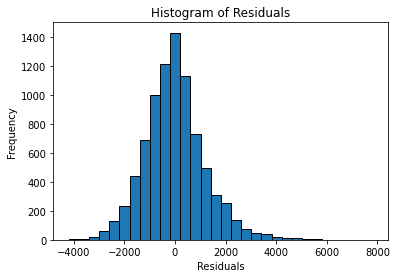

In [254]:
import matplotlib.pyplot as plt

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

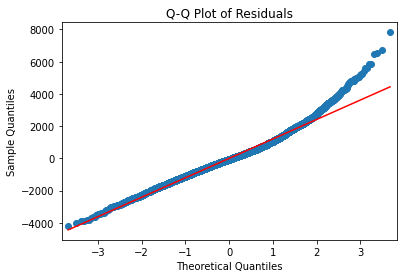

In [255]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

sm.qqplot(residuals, line='s')  # 's' for standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()


In [260]:
from scipy.stats import shapiro

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

statistic, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={statistic}, p-value={p_value}')


Shapiro-Wilk Test: Statistic=0.9778241515159607, p-value=2.2630295817794126e-34


/Users/abhilashchauhan/miniforge3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [257]:
from scipy.stats import anderson

# Assuming you have calculated residuals
# Replace 'residuals' with your actual variable name

result = anderson(residuals)
print(f'Anderson-Darling Test: Statistic={result.statistic}, Critical Values={result.critical_values}, Significance Levels={result.significance_level}')

# Interpretation: If the statistic is larger than the critical values at a specific significance level, reject the null hypothesis (non-normality is present).

Anderson-Darling Test: Statistic=37.66969248645, Critical Values=[0.576 0.656 0.787 0.918 1.091], Significance Levels=[15.  10.   5.   2.5  1. ]


In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have already loaded your dataset and selected independent variables
# Replace 'independent_variables' with your actual variable names

X = data[independent_variables]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)


                    Variable           VIF
0                      const  74458.500943
1                Item_Weight      1.001985
2           Item_Fat_Content      1.014901
3            Item_Visibility      1.052909
4                  Item_Type      1.016395
5                   Item_MRP      1.001717
6  Outlet_Establishment_Year      1.316990
7                Outlet_Size      1.598869
8       Outlet_Location_Type      1.301165
9                Outlet_Type      1.505033
